In [1]:
import csv
import random
import faker
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Faker for generating fake data
fake = faker.Faker()

# Define categories for books
categories = [
    "Fiction",
    "Non-Fiction",
    "Science",
    "History",
    "Technology",
    "Mystery",
    "Romance",
    "Self-Help",
    "Children's Books",
    "Fantasy",
    "Biography",
    "Horror"
]

# Generate a dataset of 2000 books
data = []
for _ in range(2000):
    book = {
        "Title": fake.sentence(nb_words=random.randint(2, 6)),
        "Author": fake.name(),
        "Price": round(random.uniform(5, 100), 2),
        "Rating": round(random.uniform(1, 5), 1),
        "Number of Reviews": random.randint(1, 5000),
        "Category": random.choice(categories),
        "Publication Date": fake.date_this_decade()
    }
    data.append(book)

# Write data to a CSV file
file_name = "amazon_books_dataset.csv"
with open(file_name, "w", newline="", encoding="utf-8") as file:
    writer = csv.DictWriter(file, fieldnames=data[0].keys())
    writer.writeheader()
    writer.writerows(data)

print(f"Dataset created and saved as '{file_name}'")

Dataset created and saved as 'amazon_books_dataset.csv'


In [2]:
# Data Cleaning and Loading
print("\nLoading and cleaning the dataset...")
df = pd.read_csv(file_name)
print(df.info())


Loading and cleaning the dataset...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              2000 non-null   object 
 1   Author             2000 non-null   object 
 2   Price              2000 non-null   float64
 3   Rating             2000 non-null   float64
 4   Number of Reviews  2000 non-null   int64  
 5   Category           2000 non-null   object 
 6   Publication Date   2000 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 109.5+ KB
None


In [7]:
# Convert 'Publication Date' to datetime
df['Publication Date'] = pd.to_datetime(df['Publication Date'], errors='coerce')

# Handle missing or invalid data (if any)
df.dropna(inplace=True)

# Exploratory Data Analysis (EDA)
print("\nBasic Statistics:")
print(df.describe())

print("\nTop Categories:")
print(df['Category'].value_counts())



Basic Statistics:
             Price      Rating  Number of Reviews            Publication Date
count  2000.000000  2000.00000        2000.000000                        2000
mean     52.247545     2.94805        2543.134500  2022-07-05 00:43:55.200000
min       5.000000     1.00000           3.000000         2020-01-01 00:00:00
25%      29.050000     2.00000        1260.500000         2021-04-27 18:00:00
50%      50.890000     2.90000        2581.500000         2022-07-28 00:00:00
75%      76.680000     3.92500        3826.000000         2023-09-20 06:00:00
max      99.940000     5.00000        4996.000000         2024-12-11 00:00:00
std      27.430063     1.15545        1464.858622                         NaN

Top Categories:
Category
Fiction             195
Romance             194
Non-Fiction         173
Children's Books    165
Science             165
Horror              165
Mystery             164
Self-Help           162
Biography           161
Technology          158
Fantasy      


Visualizing the data...


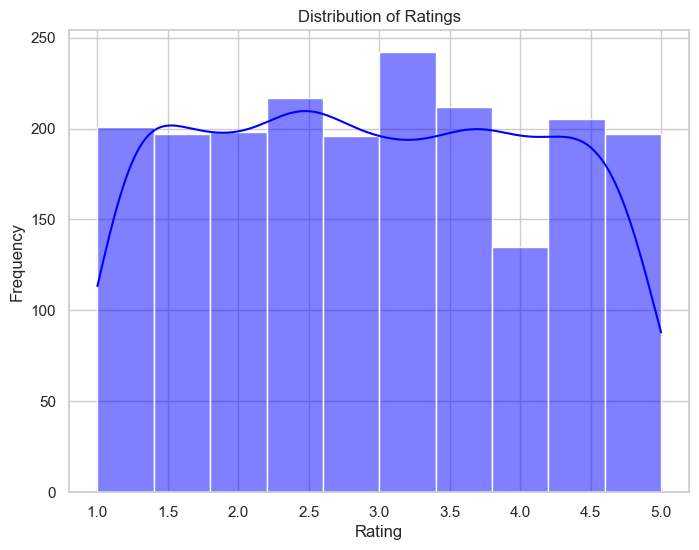

In [8]:
# Data Visualization
print("\nVisualizing the data...")
sns.set(style="whitegrid")

# Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=10, kde=True, color='blue')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

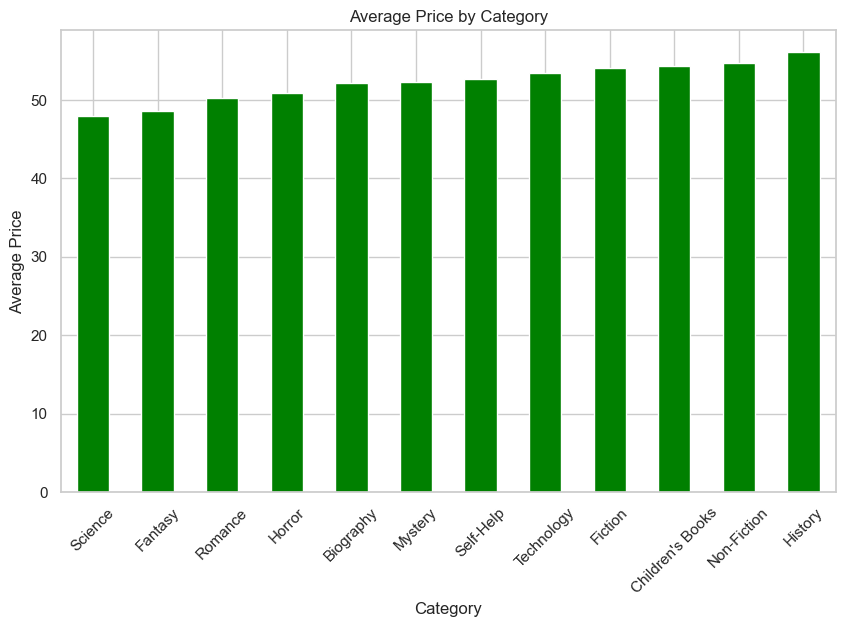

In [9]:
# Average Price by Category
plt.figure(figsize=(10, 6))
category_price = df.groupby('Category')['Price'].mean().sort_values()
category_price.plot(kind='bar', color='green')
plt.title("Average Price by Category")
plt.xlabel("Category")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

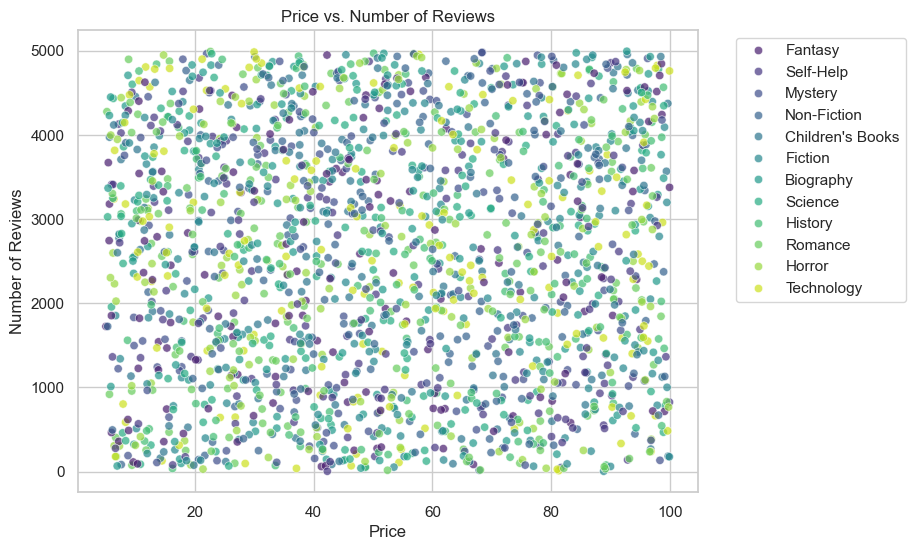

In [10]:
# Scatter plot: Price vs. Number of Reviews
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Number of Reviews', data=df, hue='Category', palette='viridis', alpha=0.7)
plt.title("Price vs. Number of Reviews")
plt.xlabel("Price")
plt.ylabel("Number of Reviews")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

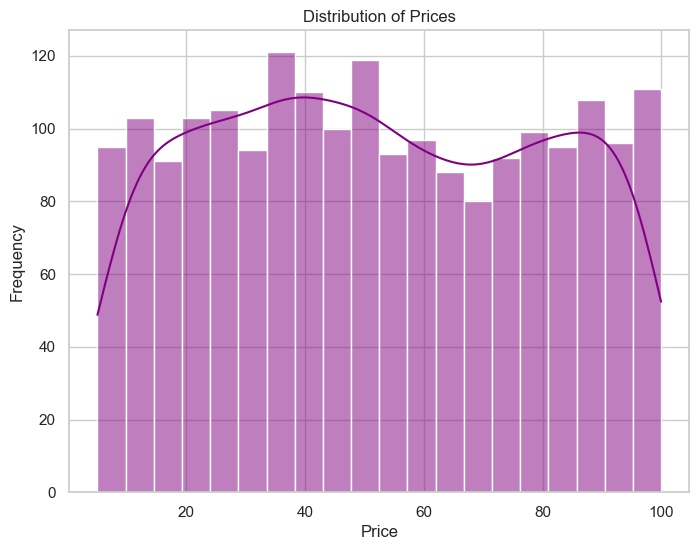

In [11]:
# Distribution of Prices
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], bins=20, kde=True, color='purple')
plt.title("Distribution of Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


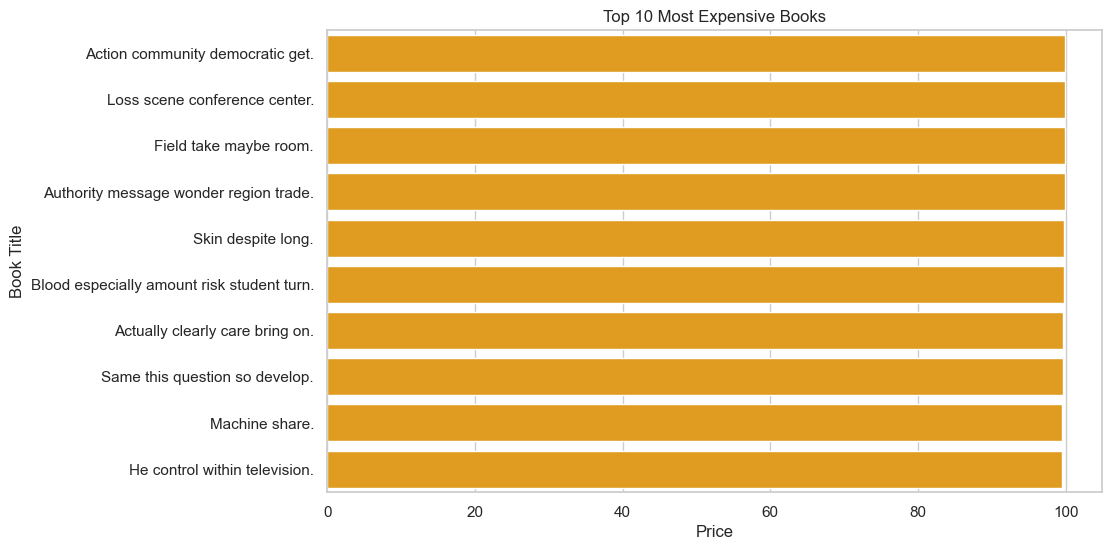

In [12]:
# Top 10 Most Expensive Books
top_expensive_books = df.nlargest(10, 'Price')
plt.figure(figsize=(10, 6))
sns.barplot(x='Price', y='Title', data=top_expensive_books, color='orange')
plt.title("Top 10 Most Expensive Books")
plt.xlabel("Price")
plt.ylabel("Book Title")
plt.show()


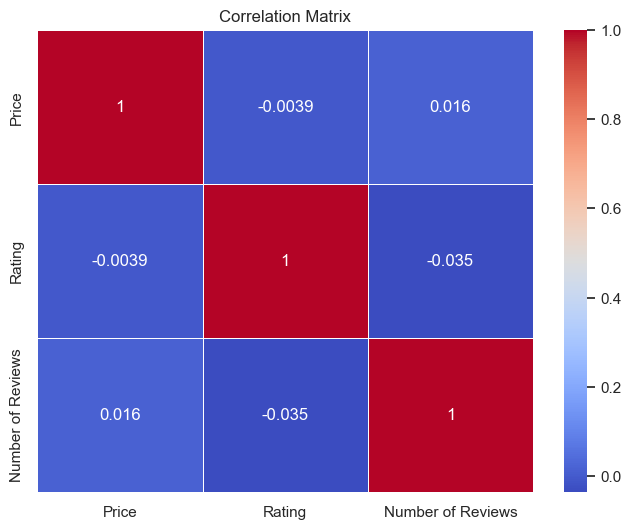

In [13]:
# Correlation Matrix
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Price', 'Rating', 'Number of Reviews']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


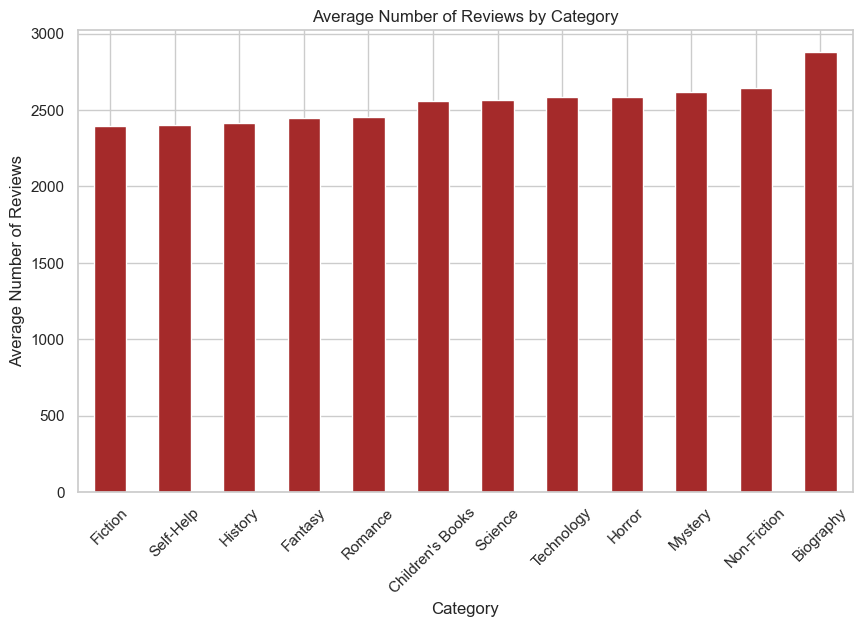

In [14]:
# Number of Reviews by Category (average)
category_reviews = df.groupby('Category')['Number of Reviews'].mean().sort_values()
plt.figure(figsize=(10, 6))
category_reviews.plot(kind='bar', color='brown')
plt.title("Average Number of Reviews by Category")
plt.xlabel("Category")
plt.ylabel("Average Number of Reviews")
plt.xticks(rotation=45)
plt.show()


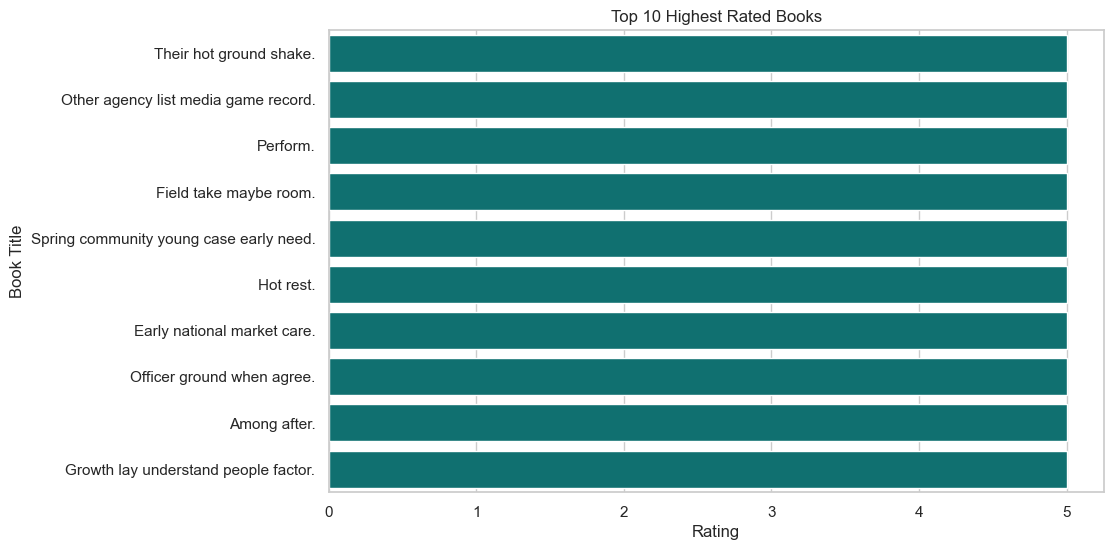

In [15]:
# Books with Highest Rating
top_rated_books = df.nlargest(10, 'Rating')
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Title', data=top_rated_books, color='teal')
plt.title("Top 10 Highest Rated Books")
plt.xlabel("Rating")
plt.ylabel("Book Title")
plt.show()


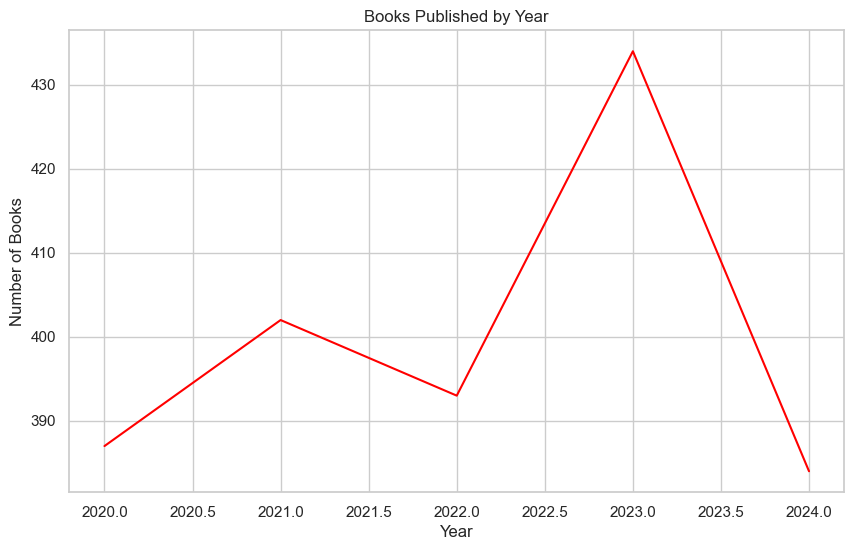

In [16]:
# Books Published by Year
df['Publication Year'] = df['Publication Date'].dt.year
books_by_year = df.groupby('Publication Year').size()
plt.figure(figsize=(10, 6))
books_by_year.plot(kind='line', color='red')
plt.title("Books Published by Year")
plt.xlabel("Year")
plt.ylabel("Number of Books")
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5964\2356877390.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Price', data=df, palette="Set2")


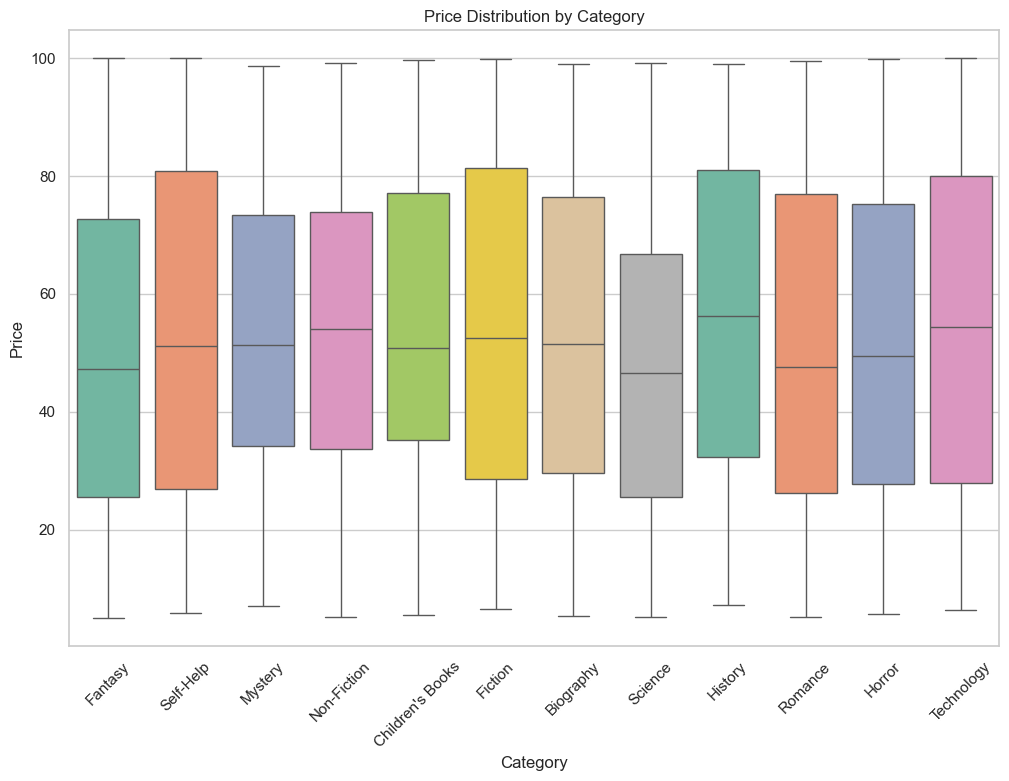

In [18]:
# Box plot of Price by Category
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Price', data=df, palette="Set2")
plt.title("Price Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()


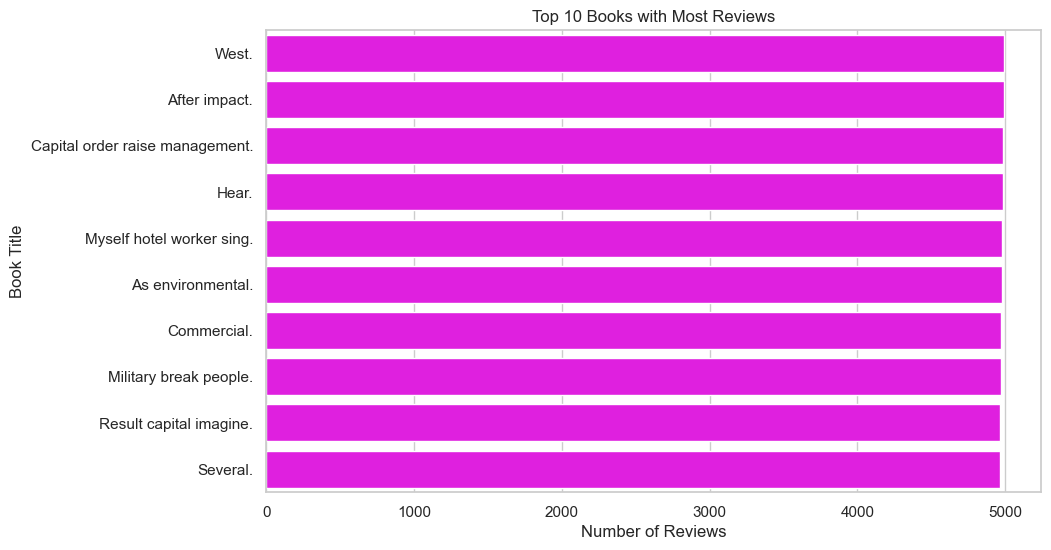

In [19]:
# Books with Most Reviews
top_reviewed_books = df.nlargest(10, 'Number of Reviews')
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Reviews', y='Title', data=top_reviewed_books, color='magenta')
plt.title("Top 10 Books with Most Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Book Title")
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5964\2564984277.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Rating', data=df, palette="coolwarm")


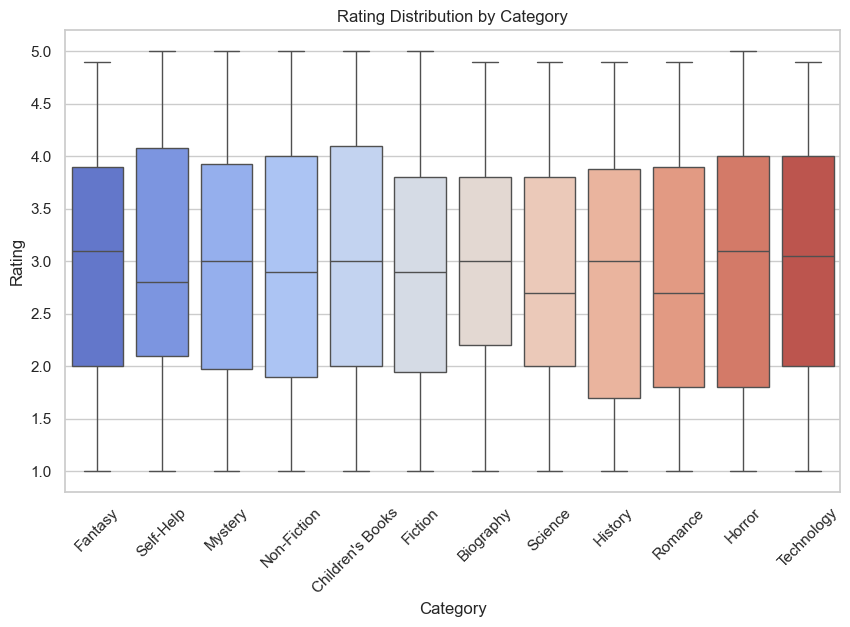

In [20]:
# Rating Distribution by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Rating', data=df, palette="coolwarm")
plt.title("Rating Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.show()


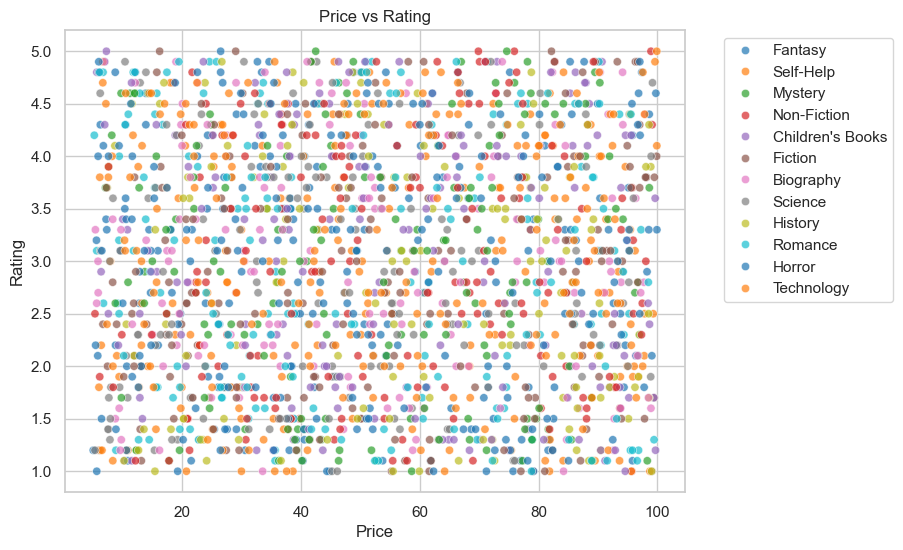

In [21]:
# Price vs Rating (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Rating', data=df, hue='Category', palette='tab10', alpha=0.7)
plt.title("Price vs Rating")
plt.xlabel("Price")
plt.ylabel("Rating")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


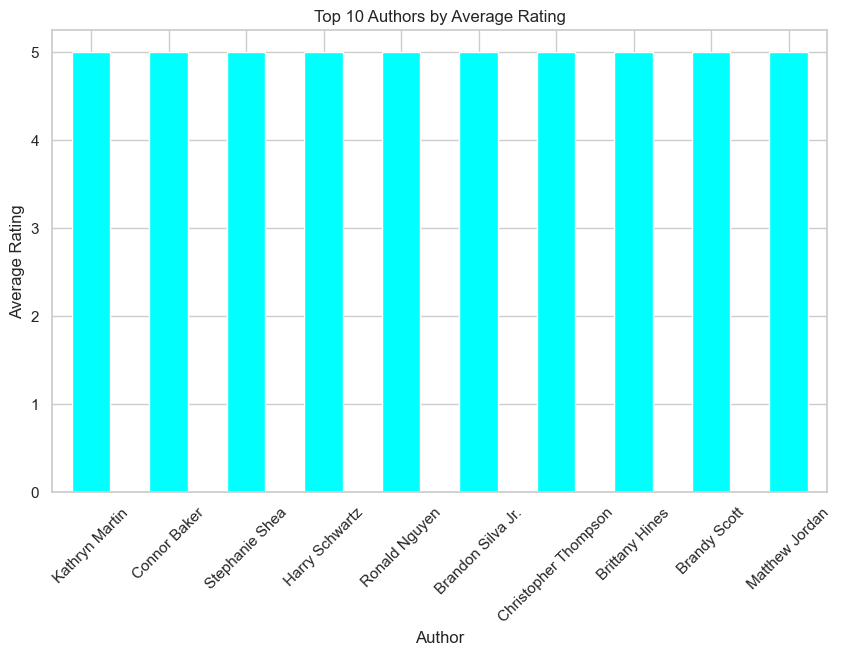

In [22]:
# Average Rating by Author
avg_rating_author = df.groupby('Author')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
avg_rating_author.plot(kind='bar', color='cyan')
plt.title("Top 10 Authors by Average Rating")
plt.xlabel("Author")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


In [23]:
# Check for missing data
missing_data = df.isnull().sum()
print("Missing Data:")
print(missing_data)


Missing Data:
Title                0
Author               0
Price                0
Rating               0
Number of Reviews    0
Category             0
Publication Date     0
Publication Year     0
dtype: int64
